In [79]:
import pandas as pd

df = pd.read_csv('Trending Videos of Sony Channel.csv')

df = df.drop(columns=['PublishedAt', 'estimated_minutes_watched', 'Thumbnail_Default', 'Video_URL'])

df['Title'] = df['Title'].str.replace(r'[^a-zA-Z\s]', '', regex = True)
df['Tags'] = df['Tags'].str.replace(r'[^a-zA-Z\s]', '', regex = True)
df['Description'] = df['Description'].str.replace(r'[^a-zA-Z\s]', '', regex = True)
df['Description'] = df['Description'].str.replace(r'\n', '', regex = True)

df.head()


#Catogories: Vector, Sentiment, Category

,Title,Description,Tags,View_count,Like_count,Comment_count,Title_length,Description_length
0,Vidaamuyarchi Pathikichu Lyric Ajith Kumar ...,Lyca Productions Subaskaran PresentsAjith Kuma...,Sony Music South Sony Music Tamil Latest Song ...,3091770,316774,13135,97,2099
1,Vidaamuyarchi Trailer Ajith Kumar Trisha Ar...,Presenting the Official Trailer of the movie V...,vidaamuyarchi trailer vidaamuyarchi bgm vidaam...,12740822,699854,19220,100,1913
2,I MADE SQUID GAME IN MINECRAFT,So Today I Recreated Squid Game in Minecraft w...,minecraft squid game squid game minecraft squi...,1589491,63362,5403,30,608
3,RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...,RG Kar Verdict Lawye...,Bengali News Bangla News RG Kar Verdict News R...,737284,6856,1600,91,897
4,Ashish Chanchlani Akash Dodeja Roast On Thuge...,Welcome to DominosPizzaIndia Presents The Thu...,thugesh thugesh thug life thugesh funny thuges...,4382982,379240,18226,86,1748


In [80]:
from googletrans import Translator

translator = Translator()

def translate_text(text):
    try:
        translated = translator.translate(text, src = 'auto', dest = 'en')
        return translated.text
    except Exception as e:
        return text
    
df['title_trans'] = df['Title'].apply(lambda x: translate_text(str(x)))
df['description_trans'] = df['Description'].apply(lambda x: translate_text(str(x)))
df['tags_trans'] = df['Tags'].apply(lambda x: translate_text(str(x)))

print(df)

                                                Title  \
0   Vidaamuyarchi  Pathikichu Lyric  Ajith Kumar  ...   
1   Vidaamuyarchi Trailer  Ajith Kumar  Trisha  Ar...   
2                      I MADE SQUID GAME IN MINECRAFT   
3   RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...   
4   Ashish Chanchlani  Akash Dodeja Roast On Thuge...   
5   Try Not to Laugh or Dare Challenge vs Ruchika ...   
6   Darling   Hilarious BacktoBack Comedy Scenes  ...   
7                                PatharamattuPromo      
8   NEW Taarak Mehta Ka Ooltah Chashmah  Ep    Jan...   
9                       Uppum Mulakum   Flowers  EP     
10  Meem Se Mohabbat  Episode  CC th Jan   Spons B...   
11  Kudumbasthan  Official Trailer  Manikandan  Va...   
12          Love Marriage  the mridul  Pragati  Nitin   
13  Korean boy Tries Indian snacks for the first time   
14               Ifa Meets Her  Finally   Irfans View   
15    Smart ROBOT vs HUMAN  Who will Win in Minecraft   
16  Deva  Official Trailer l Sh

In [81]:
from langdetect import detect

def remove_non_english(text):
    words = text.split()
    english_words = [word for word in words if detect(word) == 'en']
    return ' '.join(english_words)

df['title_trans'] = df['title_trans'].apply(remove_non_english)
df['description_trans'] = df['description_trans'].apply(remove_non_english)
df['tags_trans'] = df['tags_trans'].apply(remove_non_english)

df['title_trans'] = df['title_trans'].replace('', '<UNK>')
df['description_trans'] = df['description_trans'].replace('', '<UNK>')
df['tags_trans'] = df['tags_trans'].replace('', '<UNK>')


df.head()

,Title,Description,Tags,View_count,Like_count,Comment_count,Title_length,Description_length,title_trans,description_trans,tags_trans
0,Vidaamuyarchi Pathikichu Lyric Ajith Kumar ...,Lyca Productions Subaskaran PresentsAjith Kuma...,Sony Music South Sony Music Tamil Latest Song ...,3091770,316774,13135,97,2099,<UNK>,Productions Presentsajith Pathikichualbum Ravi...,Racing Trailer Teaser Teaser Thall
1,Vidaamuyarchi Trailer Ajith Kumar Trisha Ar...,Presenting the Official Trailer of the movie V...,vidaamuyarchi trailer vidaamuyarchi bgm vidaam...,12740822,699854,19220,100,1913,<UNK>,Presenting the official of the Director Thirum...,Teaser Racing Thirumeni
2,I MADE SQUID GAME IN MINECRAFT,So Today I Recreated Squid Game in Minecraft w...,minecraft squid game squid game minecraft squi...,1589491,63362,5403,30,608,<UNK>,Recreated where EmeraldsDownload know the this...,<UNK>
3,RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...,RG Kar Verdict Lawye...,Bengali News Bangla News RG Kar Verdict News R...,737284,6856,1600,91,897,of Roy,of Convicted Roy She that from what of think s...,News News News News News News
4,Ashish Chanchlani Akash Dodeja Roast On Thuge...,Welcome to DominosPizzaIndia Presents The Thu...,thugesh thugesh thug life thugesh funny thuges...,4382982,379240,18226,86,1748,Ashish Rosts from Thugesh,to The Thugesh Season off this exciting season...,thugesh thugesh thugesh the thugesh ashish thu...


In [82]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

nltk.download('punkt', download_dir='/Users/viditparashar/nltk_data')
nltk.download('punkt_tab', download_dir='/Users/viditparashar/nltk_data')

nltk.download('stopwords', download_dir='/Users/viditparashar/nltk_data')
nltk.download('wordnet', download_dir='/Users/viditparashar/nltk_data')


stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def pre_proccessed_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]
    return ' '.join(words)

df['title_cleaned'] = df['title_trans'].apply(pre_proccessed_text)
df['description_cleaned'] = df['description_trans'].apply(pre_proccessed_text)
df['tags_cleaned'] = df['tags_trans'].apply(pre_proccessed_text)

df['title_sentiment'] = df['title_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['description_sentiment'] = df['description_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['tags_sentiment'] = df['tags_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


df.head(50)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/viditparashar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/viditparashar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viditparashar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/viditparashar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Title,Description,Tags,View_count,Like_count,Comment_count,Title_length,Description_length,title_trans,description_trans,tags_trans,title_cleaned,description_cleaned,tags_cleaned,title_sentiment,description_sentiment,tags_sentiment
0,Vidaamuyarchi Pathikichu Lyric Ajith Kumar ...,Lyca Productions Subaskaran PresentsAjith Kuma...,Sony Music South Sony Music Tamil Latest Song ...,3091770,316774,13135,97,2099,<UNK>,Productions Presentsajith Pathikichualbum Ravi...,Racing Trailer Teaser Teaser Thall,unk,production presentsajith pathikichualbum ravic...,racing trailer teaser teaser thall,0.000000,0.000000,0.000000
1,Vidaamuyarchi Trailer Ajith Kumar Trisha Ar...,Presenting the Official Trailer of the movie V...,vidaamuyarchi trailer vidaamuyarchi bgm vidaam...,12740822,699854,19220,100,1913,<UNK>,Presenting the official of the Director Thirum...,Teaser Racing Thirumeni,unk,presenting official director thirumenimusic ra...,teaser racing thirumeni,0.000000,0.000000,0.000000
2,I MADE SQUID GAME IN MINECRAFT,So Today I Recreated Squid Game in Minecraft w...,minecraft squid game squid game minecraft squi...,1589491,63362,5403,30,608,<UNK>,Recreated where EmeraldsDownload know the this...,<UNK>,unk,recreated emeraldsdownload know something feed...,unk,0.000000,0.500000,0.000000
3,RG Kar Verdict Lawyer of Sanjoy Roy Kabita Sar...,RG Kar Verdict Lawye...,Bengali News Bangla News RG Kar Verdict News R...,737284,6856,1600,91,897,of Roy,of Convicted Roy She that from what of think s...,News News News News News News,roy,convicted roy think sealdahcourt information h...,news news news news news news,0.000000,0.000000,0.000000
4,Ashish Chanchlani Akash Dodeja Roast On Thuge...,Welcome to DominosPizzaIndia Presents The Thu...,thugesh thugesh thug life thugesh funny thuges...,4382982,379240,18226,86,1748,Ashish Rosts from Thugesh,to The Thugesh Season off this exciting season...,thugesh thugesh thugesh the thugesh ashish thu...,ashish rosts thugesh,thugesh season exciting season ashish chanchla...,thugesh thugesh thugesh thugesh ashish thugesh...,0.000000,0.275000,0.000000
5,Try Not to Laugh or Dare Challenge vs Ruchika ...,Who wonInstagram httpswwwinstagramcomtriggere...,triggered insaan live insaan try not to laugh ...,4674016,292585,8426,67,550,Not to Laugh or Edition,Who httpswwwfacebookcomrealtriggeredinsaanGami...,try to rathore shorts,laugh edition,httpswwwfacebookcomrealtriggeredinsaangaming h...,try rathore short,0.300000,0.000000,0.000000
6,Darling Hilarious BacktoBack Comedy Scenes ...,Get ready for a rollercoaster of laughs and sc...,Sun NXT South Indian Videos sun nxt videos sun...,490186,5200,101,98,1751,Hilarious Comedy,ready of and this hilarious horror comedy from...,South free comedy comedy,hilarious comedy,ready hilarious horror comedy watch performanc...,south free comedy comedy,0.500000,0.300000,0.400000
7,PatharamattuPromo,PatharamattuPromo A covetous mother sets out...,Abhinand Adarsh Anagha Anantha Moorthy Anirudh...,989620,14948,535,51,258,Pathramatopromeo,PatharamattuPromo mother to three to its and t...,Nanditha,pathramatopromeo,patharamattupromo mother three soulmatespathar...,nanditha,0.000000,0.000000,0.000000
8,NEW Taarak Mehta Ka Ooltah Chashmah Ep Jan...,Click here to subscribe to SAB httpswwwyoutube...,Nitish Bhaluni Ooltah Chashmah sab tv channe...,6206695,88103,2243,69,1507,New teaser,Click to to httpswwwyoutubecomchannelUCFtOuklg...,Comedy New CARAK CARAKE CARAKE CARAKE CARAKE C...,new teaser,click httpswwwyoutubecomchannelucftouklgezyivb...,comedy new carak carake carake carake carake c...,0.136364,0.327273,0.136364
9,Uppum Mulakum Flowers EP,Uppum Mulakum returns with its third season co...,flowers tv flower tv comedy flower tv malayala...,1218502,46994,3086,36,777,flows,with its third season as of TVs This and emoti...,Flowers Flower Comedy Comedy Flowers of ithu F...,flow,third season tv emotion tribulation family fam...,flower flower comedy comedy flower ithu flower...,0.000000,0.033333,0.500000


In [83]:
df = df.drop(columns = ['Title', 'Description', 'Tags', 'title_trans', 'description_trans', 'tags_trans'])
df.head(50)

,View_count,Like_count,Comment_count,Title_length,Description_length,title_cleaned,description_cleaned,tags_cleaned,title_sentiment,description_sentiment,tags_sentiment
0,3091770,316774,13135,97,2099,unk,production presentsajith pathikichualbum ravic...,racing trailer teaser teaser thall,0.000000,0.000000,0.000000
1,12740822,699854,19220,100,1913,unk,presenting official director thirumenimusic ra...,teaser racing thirumeni,0.000000,0.000000,0.000000
2,1589491,63362,5403,30,608,unk,recreated emeraldsdownload know something feed...,unk,0.000000,0.500000,0.000000
3,737284,6856,1600,91,897,roy,convicted roy think sealdahcourt information h...,news news news news news news,0.000000,0.000000,0.000000
4,4382982,379240,18226,86,1748,ashish rosts thugesh,thugesh season exciting season ashish chanchla...,thugesh thugesh thugesh thugesh ashish thugesh...,0.000000,0.275000,0.000000
5,4674016,292585,8426,67,550,laugh edition,httpswwwfacebookcomrealtriggeredinsaangaming h...,try rathore short,0.300000,0.000000,0.000000
6,490186,5200,101,98,1751,hilarious comedy,ready hilarious horror comedy watch performanc...,south free comedy comedy,0.500000,0.300000,0.400000
7,989620,14948,535,51,258,pathramatopromeo,patharamattupromo mother three soulmatespathar...,nanditha,0.000000,0.000000,0.000000
8,6206695,88103,2243,69,1507,new teaser,click httpswwwyoutubecomchannelucftouklgezyivb...,comedy new carak carake carake carake carake c...,0.136364,0.327273,0.136364
9,1218502,46994,3086,36,777,flow,third season tv emotion tribulation family fam...,flower flower comedy comedy flower ithu flower...,0.000000,0.033333,0.500000


In [84]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

title_embeddings = model.encode(df['title_cleaned'].tolist())
description_embeddings = model.encode(df['description_cleaned'].tolist())
tags_embeddings = model.encode(df['tags_cleaned'].tolist())

matrix = np.hstack((title_embeddings, description_embeddings, tags_embeddings))

title_embedding_df = pd.DataFrame(title_embeddings)
description_embedding_df = pd.DataFrame(description_embeddings)
tags_embedding_df = pd.DataFrame(tags_embeddings)



features = pd.concat([title_embedding_df, description_embedding_df, tags_embedding_df], axis=1)

features = pd.concat([features, df[['Like_count', 'Comment_count', 'Title_length', 'Description_length', 'title_sentiment', 'description_sentiment','tags_sentiment']]], axis=1)

features

,0,1,2,3,4,5,6,7,8,9,...,381,382,383,Like_count,Comment_count,Title_length,Description_length,title_sentiment,description_sentiment,tags_sentiment
0,-0.655148,0.224000,-0.600137,0.128928,-0.012487,0.005242,0.003825,0.174840,0.144663,-0.574412,...,0.432918,-0.375679,-0.114875,316774,13135,97,2099,0.000000,0.000000,0.000000
1,-0.655148,0.224000,-0.600137,0.128928,-0.012487,0.005242,0.003825,0.174840,0.144663,-0.574412,...,0.237727,-0.285725,0.373338,699854,19220,100,1913,0.000000,0.000000,0.000000
2,-0.655148,0.224000,-0.600137,0.128928,-0.012487,0.005242,0.003825,0.174840,0.144663,-0.574412,...,-0.585315,-0.088975,0.744751,63362,5403,30,608,0.000000,0.500000,0.000000
3,-0.362732,0.157140,-0.308162,-0.380489,0.317088,0.671378,0.576358,0.806901,-0.047103,0.019535,...,-0.406867,0.557221,0.127253,6856,1600,91,897,0.000000,0.000000,0.000000
4,-0.165569,0.472184,-0.045929,-0.236947,-0.117609,-0.261544,0.662938,0.217258,0.266487,-0.211391,...,-1.105470,0.063348,-0.013369,379240,18226,86,1748,0.000000,0.275000,0.000000
5,-0.578588,0.531235,0.238427,-0.446310,0.365921,0.278898,0.571672,-0.442875,0.015319,-0.255152,...,0.252579,0.331769,0.282036,292585,8426,67,550,0.300000,0.000000,0.000000
6,-0.358235,-0.155612,-0.214640,-0.574914,-0.162813,0.083465,1.147073,-0.055438,0.058721,-0.047567,...,0.123661,-0.354918,-0.679856,5200,101,98,1751,0.500000,0.300000,0.400000
7,0.024809,-0.045964,0.242632,0.084744,-0.320952,-0.044663,-0.345779,0.582957,0.105988,-0.055355,...,0.045431,-0.138204,-0.330115,14948,535,51,258,0.000000,0.000000,0.000000
8,-0.822555,0.047248,0.148997,-0.874814,0.512691,0.234030,0.373640,-0.121321,0.431563,-0.527879,...,-0.335108,-0.782005,-0.383091,88103,2243,69,1507,0.136364,0.327273,0.136364
9,-0.141099,-0.037208,0.112669,0.066630,-0.342521,-0.468954,0.950493,-0.154065,0.339168,0.240473,...,-0.001092,0.880972,-0.217264,46994,3086,36,777,0.000000,0.033333,0.500000


In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA


X = features
y = df['View_count']

X.columns = X.columns.astype(str)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Squared Error: {r2}')

Mean Squared Error: 43783071146781.39
Mean Squared Error: 0.2669118466464382


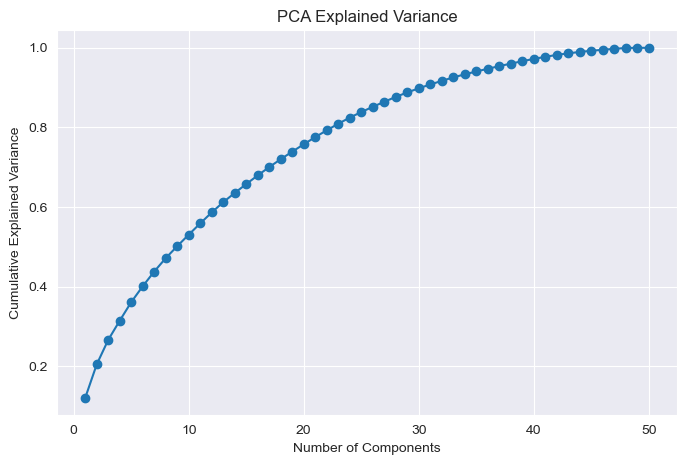

Number of components to retain 95% variance: 37


In [86]:
import matplotlib.pyplot as plt

pca = PCA() 
pca.fit(matrix)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

n_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

In [87]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


pca = PCA(n_components=44)
X_reduced = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_pca = mean_squared_error(y_test, y_pred)
r2_pca = r2_score(y_test, y_pred)

print(f'Mean Squared Error (PCA): {mse_pca}')
print(f'R2 (PCA): {r2_pca}')

param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']

}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")




Mean Squared Error (PCA): 39303254183717.18
R2 (PCA): 0.3419203067383503
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 300}


/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
268 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/viditparashar/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validat

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns


model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_leaf = 1, min_samples_split=2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

print(f'Final Mean Squared Error: {final_mse}')
print(f'Final r2: {final_r2}')



Final Mean Squared Error: 46954290352959.61
Final r2: 0.21381408144073166
